In [ ]:
#task1

In [2]:
import pandas as pd

df = pd.read_csv('/content/Titanic-Dataset.csv')
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
display(df.isnull().sum())

/tmp/ipython-input-1735679289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1735679289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Name')
df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)
display(df.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,True,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,True,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,True,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,False,True,...,False,False,False,False,False,False,False,False,False,True


In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('PassengerId')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,-0.789272,0.827377,"Braund, Mr. Owen Harris",-0.565736,0.432793,-0.473674,-0.502445,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2,1.266990,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,0.432793,-0.473674,0.786845,True,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1.266990,0.827377,"Heikkinen, Miss. Laina",-0.258337,-0.474545,-0.473674,-0.488854,True,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1.266990,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,0.432793,-0.473674,0.420730,True,False,...,False,False,False,False,False,False,False,False,False,True
4,5,-0.789272,0.827377,"Allen, Mr. William Henry",0.433312,-0.474545,-0.473674,-0.486337,False,True,...,False,False,False,False,False,False,False,False,False,True


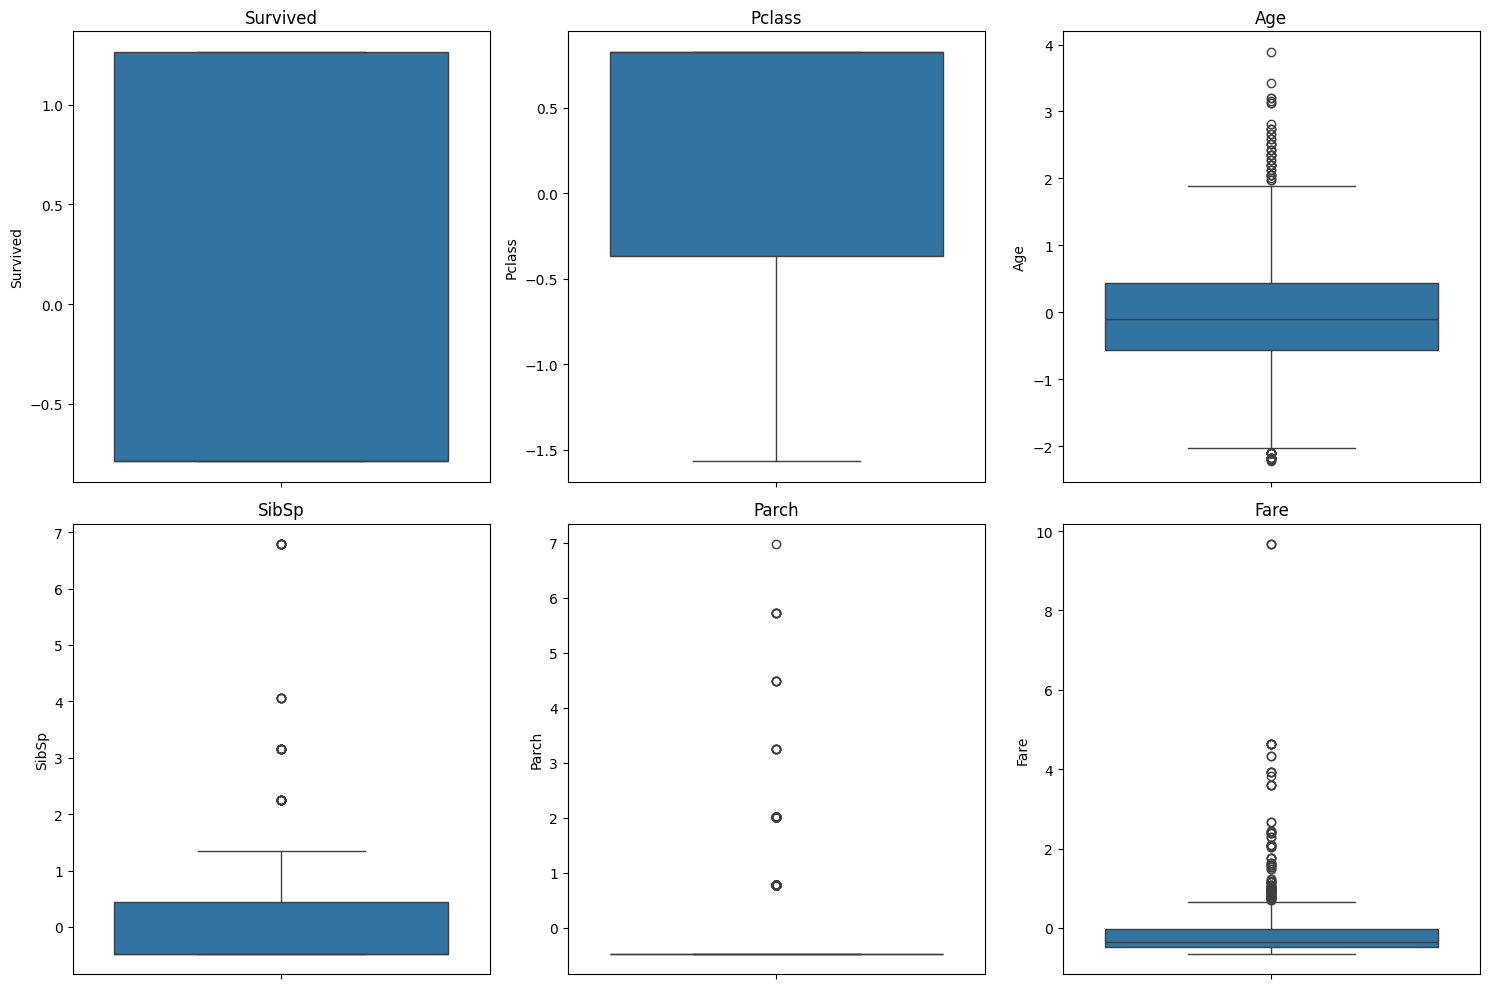

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('PassengerId')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [8]:
for col in numerical_cols:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

display(df.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,-0.789272,0.827377,"Braund, Mr. Owen Harris",-0.565736,0.432793,-0.473674,-0.502445,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2,1.266990,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,0.432793,-0.473674,0.786845,True,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1.266990,0.827377,"Heikkinen, Miss. Laina",-0.258337,-0.474545,-0.473674,-0.488854,True,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1.266990,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,0.432793,-0.473674,0.420730,True,False,...,False,False,False,False,False,False,False,False,False,True
4,5,-0.789272,0.827377,"Allen, Mr. William Henry",0.433312,-0.474545,-0.473674,-0.486337,False,True,...,False,False,False,False,False,False,False,False,False,True
